In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from plotting import set_defense_context

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
def add_coordinate_frame(ax):
    """Set RGB coordinate frame to axes.
    
    Parameters
    ----------
    ax : matplotlib.axes._subplots.Axes3DSubplot
        3-D axes subplot.
    
    Returns
    -------
    matplotlib.axes._subplots.Axes3DSubplot
        Axes with coordinate frame.
    """
    ax.quiver(-2.5, -1, -1.5, 0.75, 0, 0, color='r')
    ax.text(-1.35, -1, -1.5, s='$x$', color='r', fontweight='bold')
    ax.quiver(-2.5, -1, -1.5, 0, 0.75, 0, color='g')
    ax.text(-2.5, +0.25, -1.5, s='$y$', color='g', fontweight='bold')
    ax.quiver(-2.5, -1, -1.5, 0, 0, 0.75, color='b')
    ax.text(-2.5, -1, -0.5, s='$z$', color='b', fontweight='bold')
    ax.scatter(-2.5, -1, -1.5, color='k', depthshade=False)
    return ax

In [4]:
def v(t, s):
    """Parametric surface in 3-D:
    v(t, s) = (t + 1) i + (s) j + (s^2 - t^2 + 1) k
    """
    return np.c_[t + 1,
                 s,
                 s ** 2 - t ** 2 + 1]

def v_t(t, s):
    """First derivative of parametric surface, v, wrt t:
    v_t(t, s) = i  + (-2 t) k
    """
    return np.c_[np.ones_like(t),
                 np.zeros_like(t),
                 - 2 * t]

def v_s(t, s):
    """First derivative of parametric surface, v, wrt s:
    v_s(t, s) = j + (2 s) k
    """
    return np.c_[np.zeros_like(s),
                 np.ones_like(s),
                 2 * s]

def f(x, y, z):
    """Vector field that passes through V(t, s):
    """
    return np.c_[np.ones_like(x),
                 np.ones_like(y),
                 np.ones_like(z)]

I_exact = 16  # exact solution of flux of f-field through v-surface

# Analitically estimated normals

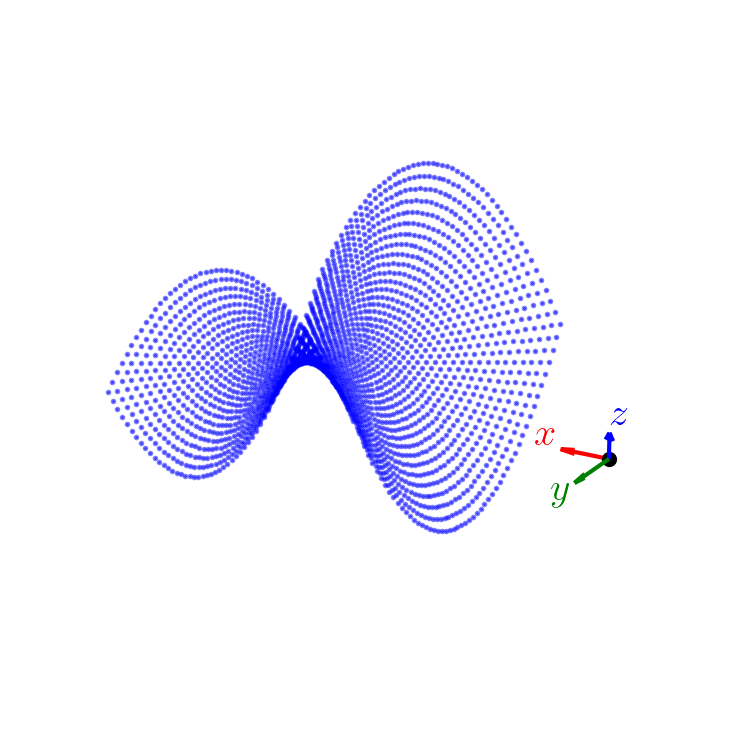

In [5]:
# integration domain
t_a, t_b = -2, 2
s_a, s_b = -2, 2

# scattered points
t = np.linspace(t_a, t_b, 51)
s = np.linspace(s_a, s_b, 51)
T, S = np.meshgrid(t, s)

# scattered parametric surface
V = v(T.ravel(), S.ravel())

# visualization
with set_defense_context():
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection ='3d')
    ax.plot(*V.T, 'bo', ms=1, alpha=0.5)
    ax = add_coordinate_frame(ax)
    ax.view_init(20, 120)
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

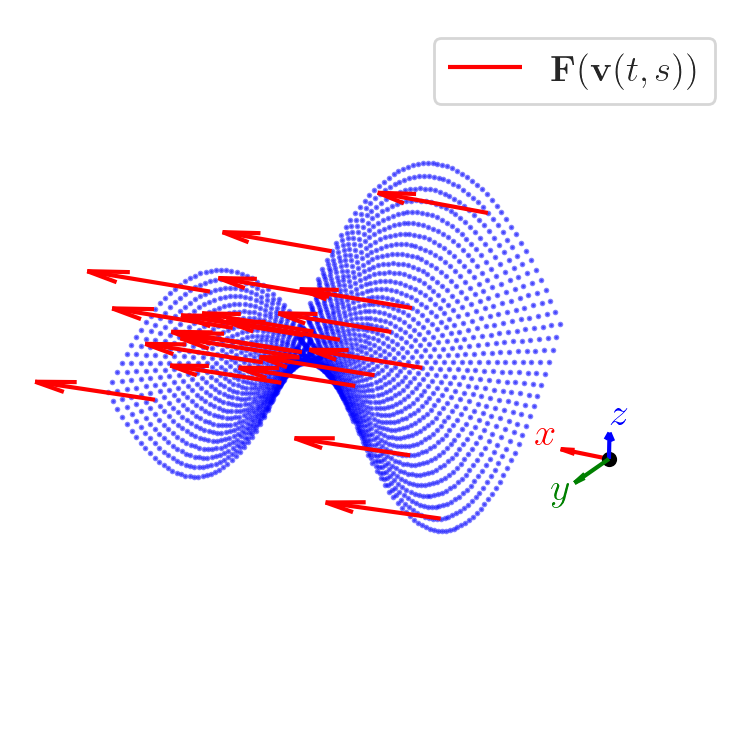

In [6]:
# compute vector field F across the surface v
x, y, z = V.T
F = f(x, y, z)

# visualization
show_idx = np.random.randint(0, F.shape[0], size=21)
with set_defense_context():
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection ='3d')
    ax.plot(*V.T, 'bo', ms=1, alpha=0.5)
    ax.quiver(*V[show_idx, :].T,
              *F[show_idx, :].T,
              color='red',
              length=1,
              label=r'$\mathbf{F}(\mathbf{v}(t, s))$')
    ax = add_coordinate_frame(ax)
    ax.legend()
    ax.view_init(20, 120)
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

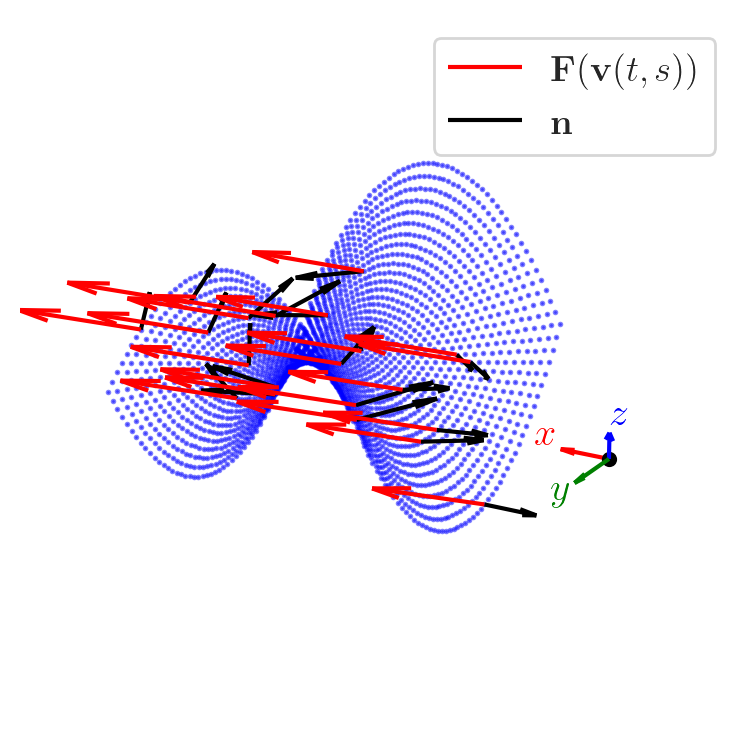

In [7]:
# compute unit normals from analytical partial derivative expressions
V_T = v_t(T.ravel(), S.ravel())
V_S = v_s(T.ravel(), S.ravel())
n = np.cross(V_T, V_S)

# visualization
show_idx = np.random.randint(0, F.shape[0], size=21)
with set_defense_context():
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection ='3d')
    ax.plot(*V.T, 'bo', ms=1, alpha=0.5)
    ax.quiver(*V[show_idx, :].T,
              *F[show_idx, :].T,
              color='red',
              length=1,
              label=r'$\mathbf{F}(\mathbf{v}(t, s))$')
    ax.quiver(*V[show_idx, :].T,
          *n[show_idx, :].T,
          color='black',
          normalize=True,
          length=1,
          label=r'$\mathbf{n}$')
    ax = add_coordinate_frame(ax)
    ax.legend()
    ax.view_init(20, 120)
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

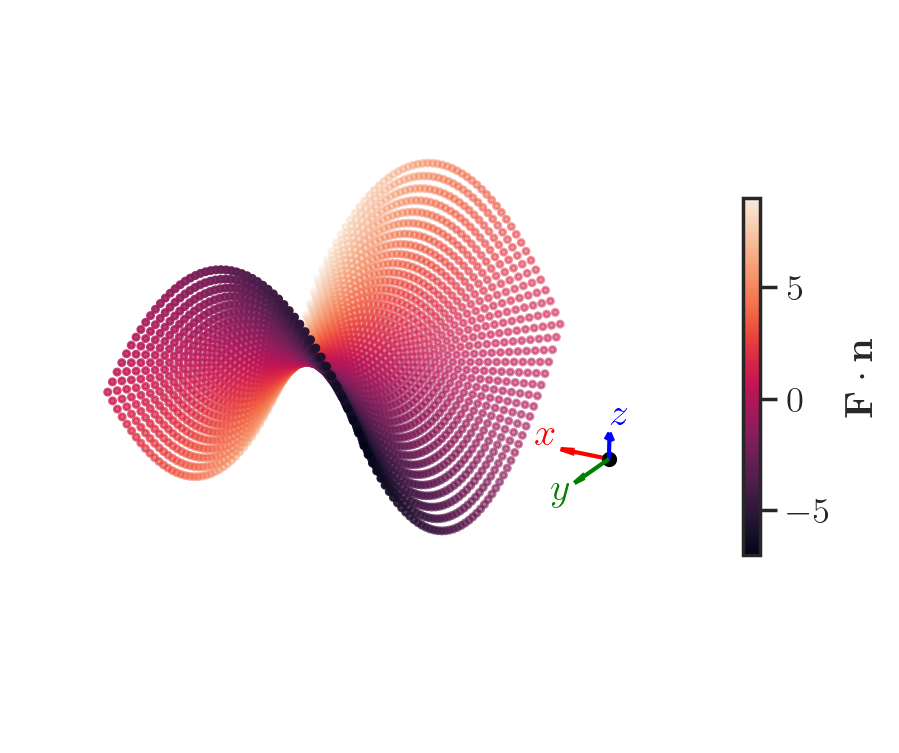

In [8]:
# compute "normalized" vector field F across the surface v
Fn = np.sum(F * n, axis=1)

# visualization
with set_defense_context():
    fig = plt.figure(figsize=(5, 4))
    ax = plt.axes(projection ='3d')
    ax = add_coordinate_frame(ax)
    cs = ax.scatter(*V.T, s=5, c=Fn)
    cbar = fig.colorbar(cs, shrink=0.5, pad=0.01)
    cbar.ax.set_ylabel(r'$\mathbf{F} \cdot \mathbf{n}$')
    ax.view_init(20, 120)
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

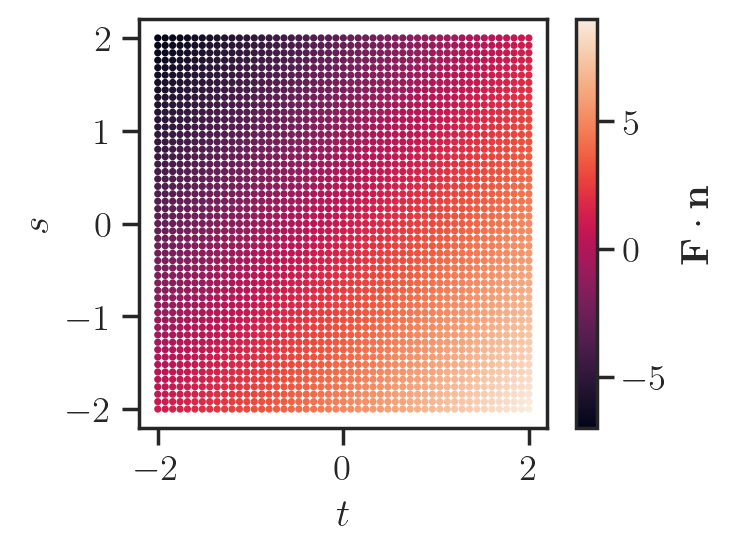

In [9]:
# visualization of normalized vector Field across parametric surface
with set_defense_context():
    fig = plt.figure(figsize=(4, 3))
    ax = plt.axes()
    cs = ax.scatter(T.ravel(), S.ravel(), s=2.5, c=Fn)
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(r'$\mathbf{F} \cdot \mathbf{n}$')
    ax.set(xlabel='$t$', ylabel='$s$', aspect='equal')
    fig.tight_layout()
    plt.show()

# Normals derived via spline interpolant

In [10]:
# point cloud representation from scattered parametric surface
x, y, z = V.T

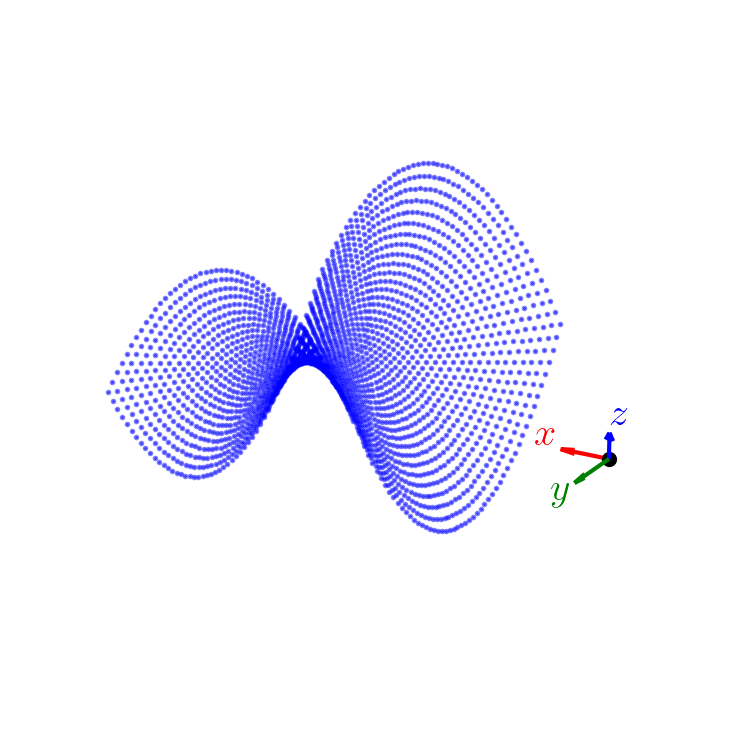

In [11]:
# B-spline interpolation
interpolator = interpolate.SmoothBivariateSpline(x, y, z)
z_interp = interpolator(x, y, grid=False)

# visualization
with set_defense_context():
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection ='3d')
    ax.plot(x, y, z_interp, 'bo', ms=1, alpha=0.5)
    ax = add_coordinate_frame(ax)
    ax.view_init(20, 120)
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

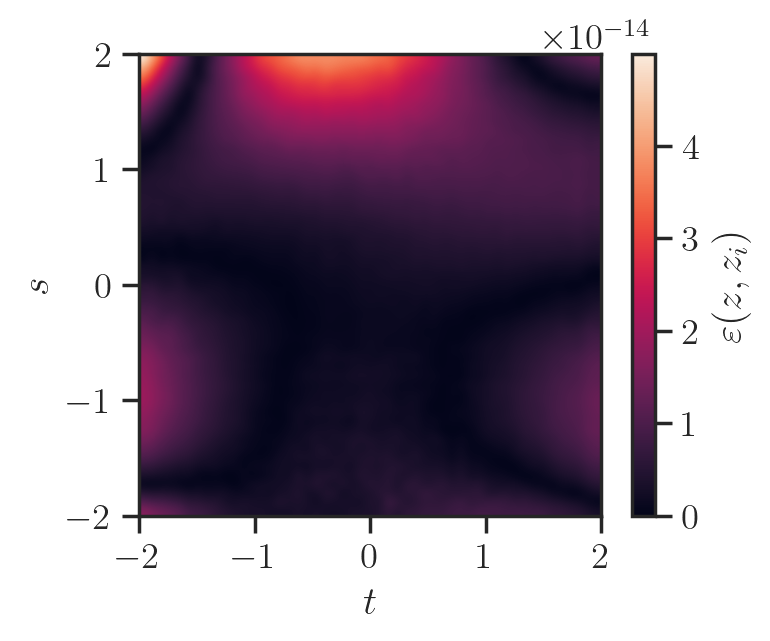

In [12]:
# visualization of interpolation error
with set_defense_context():
    fig = plt.figure(figsize=(4, 3))
    ax = plt.axes()
    cs = ax.imshow(np.abs(z_interp-z).reshape(51, 51),
                   extent=[t_a, t_b, s_a, s_b],
                   aspect='equal', origin='lower',
                   interpolation='bicubic')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(r'$\varepsilon(z, z_i)$')
    ax.set(xlabel='$t$', ylabel='$s$')
    plt.show()

In [13]:
# compute unit normals from partial derivatives of interpolation of z
dzdx_interp = interpolator(x, y, dx=1, dy=0, grid=False)
dzdy_interp = interpolator(x, y, dx=0, dy=1, grid=False)
n_interp = np.c_[-dzdx_interp,
                 -dzdy_interp,
                 np.ones_like(dzdy_interp)]
np.all(np.isclose(n, n_interp))

True

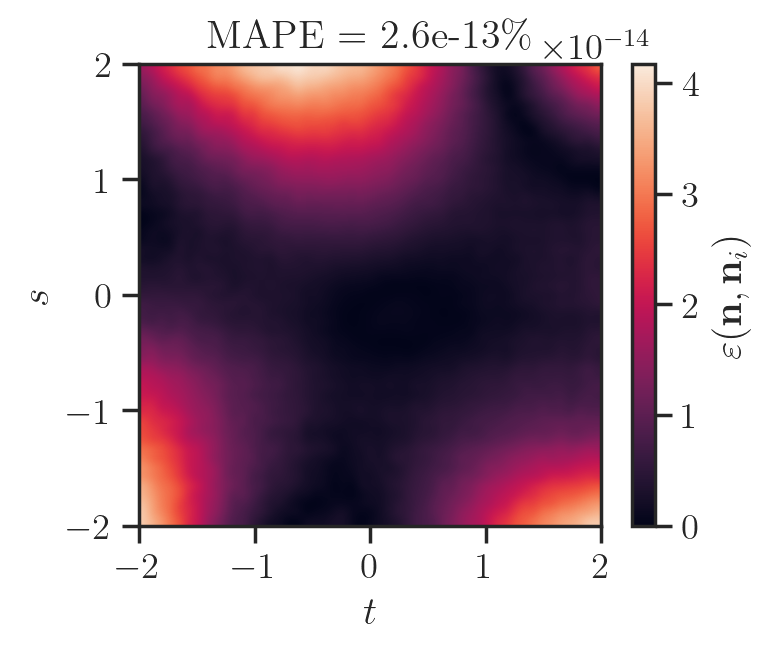

In [14]:
# error of the magnitudes of analytically computed and estimated normals
n_mag = np.linalg.norm(n, axis=1)
n_interp_mag = np.linalg.norm(n_interp, axis=1)
n_ae = np.abs(n_interp_mag-n_mag)
n_mape = np.mean(n_ae / n_mag) * 100

# visualization of normal error
with set_defense_context():
    fig = plt.figure(figsize=(4, 3))
    ax = plt.axes()
    cs = ax.imshow(np.abs(n_interp_mag-n_mag).reshape(51, 51),
                   extent=[t_a, t_b, s_a, s_b],
                   aspect='equal', origin='lower',
                   interpolation='bicubic')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel(r'$\varepsilon(\mathbf{n}, \mathbf{n}_i)$')
    ax.set(xlabel='$t$', ylabel='$s$', title=f'MAPE = {n_mape:.2g}\%')
    plt.show()